<a href="https://colab.research.google.com/github/Natali1599/MineriaDatos/blob/main/Parcial_pr%C3%A1ctico_Miner%C3%ADa_de_datos_Segundo_Corte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial práctico Minería de datos.

por Natali Hernández Cardozo

version 0.1, Octubre 2022

Segundo Corte

Cedula: ********05.

Si mi cédula termina en 05, entonces realizo matemáticas (0) y clasificación (5)

Los datos trabajados aquí, abordan el rendimiento de los estudiantes en la educación secundaria de dos escuelas portuguesas. Los atributos de los datos incluyen las calificaciones de los estudiantes, las características demográficas, sociales y relacionadas con la escuela) y se recogieron mediante informes escolares y cuestionarios. 

Se proporcionan dos conjuntos de datos relativos al rendimiento en dos asignaturas distintas: Matemáticas (mat) y lengua portuguesa (por). En [Cortez y Silva, 2008], los dos conjuntos de datos fueron modelados bajo tareas de clasificación y regresión binarias/de cinco niveles. 

### Nota importante: el atributo objetivo G3 tiene una fuerte correlación con los atributos G2 y G1. Esto ocurre porque G3 es la nota del último año (emitida en el tercer período), mientras que G1 y G2 corresponden a las notas del primer y segundo período.

Teniendo en cuenta lo anterior y los archivos adjuntos que contienen los datos (student-mat.csv o student-por.csv) junto con su respectivo diccionario de datos (student.txt), responda las siguientes preguntas:

### NOTA: dado que es un problema de clasificación la variable G3 no será la variable objetivo dado que es continua, por ende, la variable objetivo será address.


1.	Realice el proceso de verificación de calidad de datos y limpieza si es necesario realizarla. Mencione al final del punto, un resumen de los hallazgos encontrados.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
pd.set_option('display.max_columns', None) #Mostrar todas las columnas

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
d = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Minería de datos parcial/student-mat.csv', 
                 sep = ';',
                 thousands=',', decimal='.',
                 skip_blank_lines=True,
                 low_memory = False,
                 dtype={
                     'Nit Entidad': str
                 })
d.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4.0,3,4,1,1,3.0,6.0,5.0,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5.0,3,3,1,1,3.0,4.0,5.0,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4.0,3,2,2,3,3.0,10.0,7.0,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2,2,1,1,5.0,2.0,15.0,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4.0,3,2,1,2,5.0,4.0,6.0,10,10


In [9]:
df = d.reset_index()
df.head()

#TRANSFORMAR TODA LA DATA A MINUSCULAS

,index,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4.0,3,4,1,1,3.0,6.0,5.0,6,6
1,1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5.0,3,3,1,1,3.0,4.0,5.0,5,6
2,2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4.0,3,2,2,3,3.0,10.0,7.0,8,10
3,3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2,2,1,1,5.0,2.0,15.0,14,15
4,4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4.0,3,2,1,2,5.0,4.0,6.0,10,10


In [10]:
df.shape

(395, 34)

In [11]:
#datos en minuscula para evitar problemas de categorización por letras en Mayuscula.

df['internet'] = df['internet'].str.lower()
df['schoolsup'] = df['schoolsup'].str.lower()
df['famsup'] = df['famsup'].str.lower()
df['paid'] = df['paid'].str.lower()
df['activities'] = df['activities'].str.lower()
df['nursery'] = df['nursery'].str.lower()
df['higher'] = df['higher'].str.lower()

In [12]:
df['higher'].unique()

array(['yes', 'no', nan], dtype=object)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       395 non-null    int64  
 1   school      395 non-null    object 
 2   sex         394 non-null    object 
 3   age         395 non-null    int64  
 4   address     393 non-null    object 
 5   famsize     394 non-null    object 
 6   Pstatus     395 non-null    object 
 7   Medu        395 non-null    int64  
 8   Fedu        395 non-null    int64  
 9   Mjob        394 non-null    object 
 10  Fjob        395 non-null    object 
 11  reason      394 non-null    object 
 12  guardian    395 non-null    object 
 13  traveltime  395 non-null    int64  
 14  studytime   395 non-null    int64  
 15  failures    395 non-null    int64  
 16  schoolsup   394 non-null    object 
 17  famsup      395 non-null    object 
 18  paid        393 non-null    object 
 19  activities  393 non-null    o

In [14]:
df.isnull().sum().sum()

16

In [15]:
df.isnull().sum()

index         0
school        0
sex           1
age           0
address       2
famsize       1
Pstatus       0
Medu          0
Fedu          0
Mjob          1
Fjob          0
reason        1
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     1
famsup        0
paid          2
activities    2
nursery       0
higher        1
internet      0
romantic      0
famrel        1
freetime      0
goout         0
Dalc          0
Walc          0
health        1
absences      1
G1            1
G2            0
G3            0
dtype: int64

In [16]:
df[df.isnull().any(1)]

,index,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
9,9,GP,M,15,NaN,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5.0,5,1,1,1,5.0,0.0,14.0,15,15
88,88,GP,M,16,U,GT3,T,2,2,services,other,reputation,father,2,2,1,NaN,no,yes,yes,no,yes,yes,no,4.0,4,2,1,1,3.0,12.0,11.0,10,10
121,121,GP,M,15,U,GT3,T,2,2,services,services,home,father,1,4,0,no,yes,yes,NaN,yes,yes,yes,no,5.0,5,4,1,2,5.0,6.0,16.0,14,15
168,168,GP,F,16,U,GT3,T,2,2,NaN,other,home,mother,1,2,0,no,yes,yes,no,no,yes,yes,no,5.0,1,5,1,1,4.0,0.0,6.0,7,0
201,201,GP,F,16,U,GT3,T,2,3,other,other,reputation,mother,1,2,0,yes,yes,NaN,yes,yes,yes,no,no,4.0,4,3,1,3,4.0,6.0,8.0,10,10
225,225,GP,NaN,18,R,GT3,T,3,1,other,other,reputation,mother,1,2,1,no,no,no,yes,yes,yes,yes,yes,5.0,3,3,1,1,4.0,16.0,9.0,8,7
253,253,GP,M,16,R,GT3,T,2,1,other,other,course,mother,2,1,0,no,no,no,yes,no,yes,no,no,3.0,3,2,1,3,3.0,NaN,8.0,9,8
259,259,GP,F,17,U,NaN,T,2,2,services,services,course,father,1,4,0,no,no,yes,yes,yes,yes,yes,yes,3.0,4,1,1,1,2.0,0.0,10.0,9,0
268,268,GP,M,18,U,GT3,T,4,2,health,other,reputation,father,1,2,0,no,yes,NaN,yes,yes,yes,yes,yes,5.0,4,5,1,3,5.0,10.0,10.0,9,10
301,301,GP,M,17,U,LE3,T,4,4,other,teacher,NaN,father,2,1,0,no,no,yes,no,yes,yes,yes,no,4.0,1,1,2,2,5.0,0.0,11.0,11,10


In [17]:
df_depurada = df.dropna()
df_depurada.shape

(379, 34)

Se encontraron 16 datos faltantes, entre ellos dato cualitativos, por ende, se decidió quitarlos de la base de datos.

La cantidad de datos faltantes por variable son:
sex:          1
address:      2
famsize:      1
Mjob:         1
reason:       1
schoolsup     1
paid          2
activities    2
higher        1
famrel        1
health        1
absences      1
G1            1

2.	Realice un análisis exploratorio sobre las variables que considere son relevantes para el modelo, teniendo en cuenta el tipo de variable, es decir, si es cuantitativa o cualitativa/categórica. Mencione al final de punto las variables considera que son relevantes para el modelo y escoja 5 según dichos criterios.

In [18]:
df_depurada.describe()

,index,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,194.416887,16.686016,2.759894,2.532982,1.451187,2.034301,0.340369,3.936675,3.232190,3.124011,1.490765,2.300792,3.546174,5.738786,10.957784,10.817942,10.532982
std,113.490649,1.282396,1.102127,1.086641,0.704947,0.836587,0.754339,0.888611,0.980723,1.102152,0.900790,1.298870,1.395327,8.085054,3.337031,3.897645,4.611447
min,0.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,96.500000,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,193.000000,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,292.500000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,394.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,28.000000,24.000000


In [19]:
df_depurada = df_depurada.reset_index()

In [20]:
corr = df_depurada.corr()
corr.style.background_gradient(cmap='coolwarm')

,level_0,index,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
level_0,1.000000,1.000000,0.756653,-0.163155,-0.115286,0.134705,0.062904,0.034184,-0.004669,0.020900,0.077502,0.085201,0.088360,-0.086325,0.071001,0.073742,-0.052577,-0.085262
index,1.000000,1.000000,0.756653,-0.163155,-0.115286,0.134705,0.062904,0.034184,-0.004669,0.020900,0.077502,0.085201,0.088360,-0.086325,0.071001,0.073742,-0.052577,-0.085262
age,0.756653,0.756653,1.000000,-0.171404,-0.162461,0.069330,0.005133,0.247507,0.061438,0.032879,0.132439,0.131457,0.115616,-0.062103,0.177056,-0.050089,-0.144316,-0.158620
Medu,-0.163155,-0.163155,-0.171404,1.000000,0.628456,-0.170054,0.074948,-0.238739,-0.023670,0.024792,0.057246,0.004422,-0.060298,-0.045240,0.095666,0.202959,0.221356,0.211593
Fedu,-0.115286,-0.115286,-0.162461,0.628456,1.000000,-0.159346,-0.008523,-0.250947,-0.019749,-0.012170,0.052903,-0.011175,-0.018294,0.013388,0.036365,0.181316,0.166010,0.131636
traveltime,0.134705,0.134705,0.069330,-0.170054,-0.159346,1.000000,-0.084627,0.088538,-0.000724,0.001131,0.043564,0.141977,0.137427,0.001625,-0.007581,-0.091970,-0.156814,-0.122183
studytime,0.062904,0.062904,0.005133,0.074948,-0.008523,-0.084627,1.000000,-0.177848,0.042075,-0.177402,-0.070616,-0.197924,-0.252982,-0.070483,-0.067118,0.152140,0.128487,0.111139
failures,0.034184,0.034184,0.247507,-0.238739,-0.250947,0.088538,-0.177848,1.000000,-0.034853,0.103873,0.133652,0.138957,0.151739,0.066715,0.058427,-0.362109,-0.356778,-0.368660
famrel,-0.004669,-0.004669,0.061438,-0.023670,-0.019749,-0.000724,0.042075,-0.034853,1.000000,0.138342,0.037752,-0.083358,-0.123271,0.094111,-0.054965,0.009802,-0.045348,0.037310
freetime,0.020900,0.020900,0.032879,0.024792,-0.012170,0.001131,-0.177402,0.103873,0.138342,1.000000,0.296359,0.218044,0.142324,0.094606,-0.080078,-0.008314,-0.035282,-0.020416


In [21]:
## Pruebas para medir la relación entre variables cualitativas
from  scipy.stats import chi2_contingency

rel_Inter_school = pd.crosstab(df_depurada['address'], df_depurada['school'],margins = False) 
kf1 = chi2_contingency(rel_Inter_school)
print('chisq-statistic 1= ',kf1[0])

rel_Inter_sex = pd.crosstab(df_depurada['address'],df_depurada['sex'],margins = False) 
kf2 = chi2_contingency(rel_Inter_sex)
print('chisq-statistic 2= ',kf2[0])

rel_Inter_fams = pd.crosstab(df_depurada['address'],df_depurada['famsize'],margins = False) 
kf3 = chi2_contingency(rel_Inter_fams)
print('chisq-statistic 3= ',kf3[0])

rel_Inter_Pst = pd.crosstab(df_depurada['address'],df_depurada['Pstatus'],margins = False) 
kf4 = chi2_contingency(rel_Inter_Pst)
print('chisq-statistic 4= ',kf4[0])

rel_Inter_Mjo = pd.crosstab(df_depurada['address'],df_depurada['Mjob'],margins = False) 
kf5 = chi2_contingency(rel_Inter_Mjo)
print('chisq-statistic 5= ',kf5[0])

rel_Inter_Fjo = pd.crosstab(df_depurada['address'],df_depurada['Fjob'],margins = False) 
kf6 = chi2_contingency(rel_Inter_Fjo)
print('chisq-statistic 6= ',kf6[0])

rel_Inter_rea = pd.crosstab(df_depurada['address'],df_depurada['reason'],margins = False) 
kf7 = chi2_contingency(rel_Inter_rea)
print('chisq-statistic 7= ',kf7[0])

rel_Inter_gua = pd.crosstab(df_depurada['address'],df_depurada['guardian'],margins = False) 
kf8 = chi2_contingency(rel_Inter_gua)
print('chisq-statistic 8= ',kf8[0])

rel_Inter_schsup = pd.crosstab(df_depurada['address'],df_depurada['schoolsup'],margins = False) 
kf9 = chi2_contingency(rel_Inter_schsup)
print('chisq-statistic 9= ',kf9[0])

rel_Inter_famsup = pd.crosstab(df_depurada['address'],df_depurada['famsup'],margins = False) 
kf10 = chi2_contingency(rel_Inter_famsup)
print('chisq-statistic 10= ',kf10[0])

rel_Inter_paid = pd.crosstab(df_depurada['address'],df_depurada['paid'],margins = False) 
kf11 = chi2_contingency(rel_Inter_paid)
print('chisq-statistic 11= ',kf11[0])

rel_Inter_activ = pd.crosstab(df_depurada['address'],df_depurada['activities'],margins = False) 
kf12 = chi2_contingency(rel_Inter_activ)
print('chisq-statistic 12= ',kf12[0])

rel_Inter_nurs = pd.crosstab(df_depurada['address'],df_depurada['nursery'],margins = False) 
kf13 = chi2_contingency(rel_Inter_nurs)
print('chisq-statistic 13= ',kf13[0])

rel_Inter_hig = pd.crosstab(df_depurada['address'],df_depurada['higher'],margins = False) 
kf14 = chi2_contingency(rel_Inter_hig)
print('chisq-statistic 14= ',kf14[0])

rel_Inter_inte = pd.crosstab(df_depurada['address'],df_depurada['internet'],margins = False) 
kf15 = chi2_contingency(rel_Inter_inte)
print('chisq-statistic 15= ',kf15[0])

rel_Inter_roma = pd.crosstab(df_depurada['address'],df_depurada['romantic'],margins = False) 
kf16 = chi2_contingency(rel_Inter_roma)
print('chisq-statistic 16= ',kf16[0])

rel_Inter_addres = pd.crosstab(df_depurada['address'],df_depurada['address'],margins = False) 
kf17 = chi2_contingency(rel_Inter_addres)
print('chisq-statistic 17= ',kf17[0])

chisq-statistic 1=  25.06875725437861
chisq-statistic 2=  0.7320252521729383
chisq-statistic 3=  1.7224503324260485
chisq-statistic 4=  0.9226444968770856
chisq-statistic 5=  12.809447782957214
chisq-statistic 6=  1.8116481242222706
chisq-statistic 7=  11.061070948879738
chisq-statistic 8=  1.745500964407603
chisq-statistic 9=  0.027261658356089326
chisq-statistic 10=  0.0
chisq-statistic 11=  0.4646598940356406
chisq-statistic 12=  0.27459393303757695
chisq-statistic 13=  0.3315441652495083
chisq-statistic 14=  0.3871687991331431
chisq-statistic 15=  17.96156426683797
chisq-statistic 16=  0.006768646691774189
chisq-statistic 17=  373.1758780538351


Las variables school, Mjob, reason e internet son variables que conservan una relación moderada con respecto a la variable objetivo.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

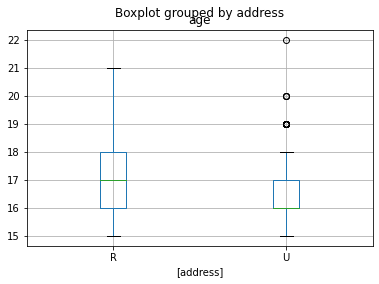

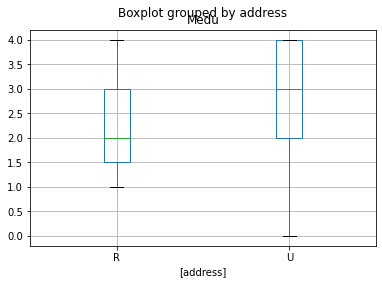

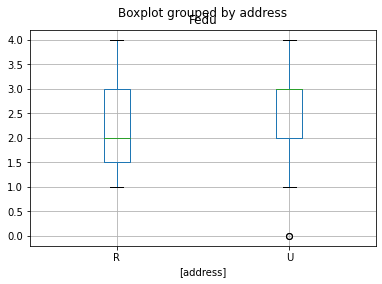

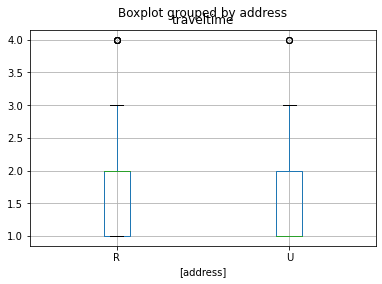

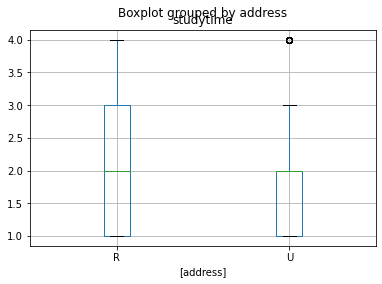

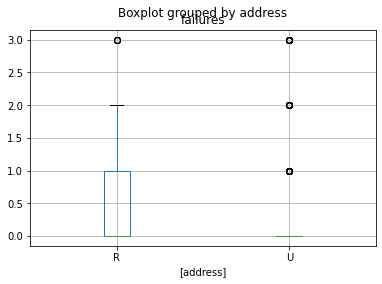

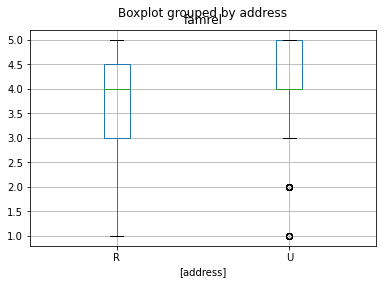

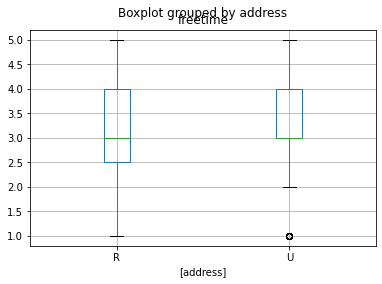

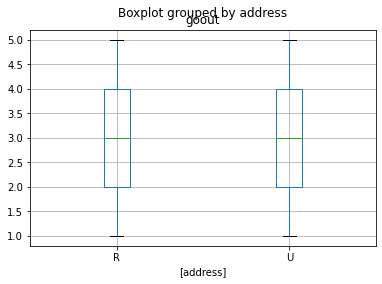

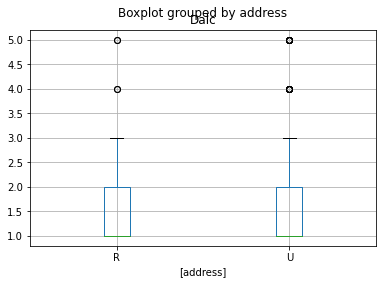

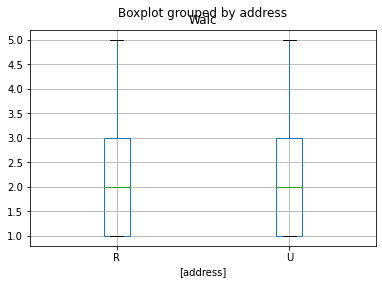

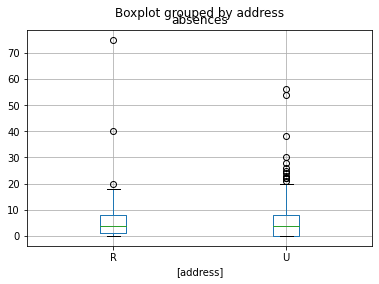

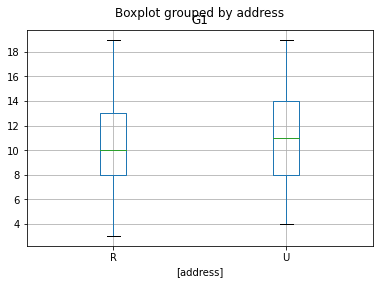

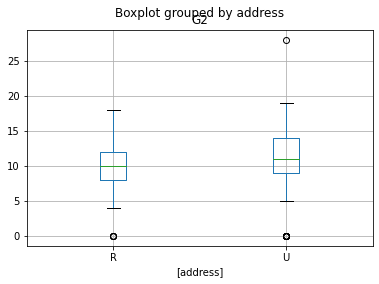

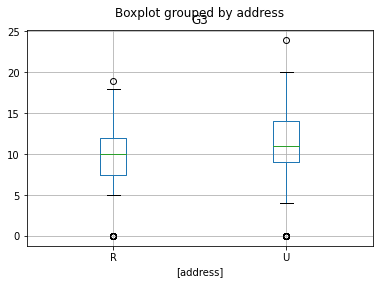

In [22]:
df_depurada.boxplot(column=['age'],by=['address'])
df_depurada.boxplot(column=['Medu'],by=['address'])
df_depurada.boxplot(column=['Fedu'],by=['address'])
df_depurada.boxplot(column=['traveltime'],by=['address'])
df_depurada.boxplot(column=['studytime'],by=['address'])
df_depurada.boxplot(column=['failures'],by=['address'])
df_depurada.boxplot(column=['famrel'],by=['address'])
df_depurada.boxplot(column=['freetime'],by=['address'])
df_depurada.boxplot(column=['goout'],by=['address'])
df_depurada.boxplot(column=['Dalc'],by=['address'])
df_depurada.boxplot(column=['Walc'],by=['address'])
df_depurada.boxplot(column=['absences'],by=['address'])
df_depurada.boxplot(column=['G1'],by=['address'])
df_depurada.boxplot(column=['G2'],by=['address'])
df_depurada.boxplot(column=['G3'],by=['address'])

Las variables age, studytime, famrel, G2 y G3 son variables que influyen en el tipo de dirección (Rural - Urbana) al que pertenecen los estudiantes.

Por ende, seleccionamos las variables G3, Studytime, age, Shcool e internet para la construcción del modelo de clasificación.

### recodificación y estandarización de los datos.

Cuando tenemos dos categorías se recomienta recodificar las variables entre 0 y 1, con la unción map.
Cuando tenemos más de dos categorías, se recomienda usar OneHotEncoder para crear una variable por cada categoría.

In [23]:
#from sklearn.preprocessing import OneHotEncoder

#codificacion1 = OneHotEncoder().fit_transform(df_depurada[["school"]])
#cols_school = pd.DataFrame(codificacion1.toarray(),columns=codificador1.categories_)

#codificacion2 = OneHotEncoder().fit_transform(df_depurada[["internet"]])
#cols_internet = pd.DataFrame(codificacion2.toarray(),columns=codificador2.categories_)


# recodificación de la varibles cualitativas
col_address= df_depurada.address.map({'U':1,'R':0})
col_school= df_depurada.school.map({'GP':1,'MS':0})
col_internet= df_depurada.internet.map({'yes':1,'no':0})


In [24]:
datos_cuanti = df_depurada[["age","studytime","G3"]]

In [25]:
#Estandarización

from sklearn.preprocessing import StandardScaler

dat_cuanti_stand = StandardScaler().fit_transform(datos_cuanti)

In [26]:
var_cuanti = pd.DataFrame(dat_cuanti_stand, columns=("age","studytime","G3"))
var_cuanti

,age,studytime,G3
0,1.025987,-0.041055,-0.984284
1,0.245165,-0.041055,-0.984284
2,-1.316477,-0.041055,-0.115731
3,-1.316477,1.155857,0.969961
4,-0.535656,-0.041055,-0.115731
...,...,...,...
374,2.587629,-0.041055,-0.332869
375,0.245165,-1.237967,1.187099
376,3.368450,-1.237967,-0.767146
377,1.025987,-1.237967,-0.115731


In [27]:
datos = pd.concat([var_cuanti,col_school,col_internet,col_address], axis="columns")
datos

,age,studytime,G3,school,internet,address
0,1.025987,-0.041055,-0.984284,1,0,1
1,0.245165,-0.041055,-0.984284,1,1,1
2,-1.316477,-0.041055,-0.115731,1,1,1
3,-1.316477,1.155857,0.969961,1,1,1
4,-0.535656,-0.041055,-0.115731,1,0,1
...,...,...,...,...,...,...
374,2.587629,-0.041055,-0.332869,0,0,1
375,0.245165,-1.237967,1.187099,0,1,1
376,3.368450,-1.237967,-0.767146,0,0,0
377,1.025987,-1.237967,-0.115731,0,1,0


3.	Seleccione un algoritmo de regresión o clasificación según le corresponda (lineal, logístico o lasso o ridge) teniendo en cuenta lo siguiente:
-	Estime el modelo utilizando las variables previamente seleccionadas utilizando todo el dataset. Varíe 2 de los parámetros del modelo en 3 posibles valores para cada uno.


In [28]:
# en este caso vamos a estimar la probabilidad de que joven esté estudaindo
# en un colegio Urbano.

from sklearn.linear_model import LogisticRegression
log_reg1 = LogisticRegression(solver='liblinear',C=1e3)
log_reg2 = LogisticRegression(solver='liblinear',C=3e9)
log_reg3 = LogisticRegression(solver='liblinear',C=7e5)

X = datos.drop('address', axis=1)
y = datos['address']

log_reg1.fit(X, y)
log_reg2.fit(X, y)
log_reg3.fit(X, y)

LogisticRegression(C=700000.0, solver='liblinear')

In [29]:
log_reg1.coef_

array([[-0.04272462, -0.20873865,  0.24524243,  1.55484545,  1.09828483]])

In [30]:
log_reg2.coef_

array([[-0.04266291, -0.20876273,  0.24525351,  1.55521147,  1.09846017]])

In [31]:
log_reg3.coef_

array([[-0.042663  , -0.2087627 ,  0.24525349,  1.55521095,  1.09845992]])

In [32]:
#datos_cuantitativos = df_depurada[["age","Medu","Fedu","traveltime","studytime","failures","famrel","freetime","goout","Dalc","Walc","health","absences","G1","G2","G3"]]
#dat_cuanti_stand_mod = StandardScaler().fit_transform(datos_cuantitativos)

-	Estime el modelo utilizando únicamente una partición de entrenamiento (80%) and test (20%). Varíe 2 de los parámetros del modelo en 3 posibles valores para cada uno.

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 86)
X_train.shape , X_test.shape

((303, 5), (76, 5))

In [34]:
from sklearn.linear_model import LogisticRegression
log_reg4 = LogisticRegression(solver='liblinear',C=1e3)
log_reg5 = LogisticRegression(solver='liblinear',C=1e9)
log_reg6 = LogisticRegression(solver='liblinear',C=2e5)

log_reg4.fit(X_train, y_train)
log_reg5.fit(X_train, y_train)
log_reg6.fit(X_train, y_train)

LogisticRegression(C=200000.0, solver='liblinear')

In [35]:
log_reg4.coef_

array([[-0.08823524, -0.28988123,  0.34817701,  1.83293505,  1.55409327]])

In [36]:
log_reg5.coef_

array([[-0.08813993, -0.28992518,  0.3482099 ,  1.83364036,  1.55446705]])

In [37]:
log_reg6.coef_

array([[-0.08814041, -0.28992496,  0.34820974,  1.83363683,  1.55446518]])

-	Estime el modelo, utilizando la partición anterior, pero en la partición de entrenamiento utilizar un K Fold Cross Validation (k=5 y k=10).

In [38]:
from sklearn.model_selection import KFold

cv5 = KFold(n_splits=5, random_state=98, shuffle=True)
cv10 = KFold(n_splits=10, random_state=56, shuffle=True)

In [39]:
from sklearn.model_selection import cross_val_score
scores_mod1 = cross_val_score(log_reg1, X, y, scoring='neg_mean_squared_error', cv=cv5, n_jobs=-1)
scores_mod1_10 = cross_val_score(log_reg1, X, y, scoring='neg_mean_squared_error', cv=cv10, n_jobs=-1)

scores_mod2 = cross_val_score(log_reg2, X, y, scoring='neg_mean_squared_error', cv=cv5, n_jobs=-1)
scores_mod2_10 = cross_val_score(log_reg2, X, y, scoring='neg_mean_squared_error', cv=cv10, n_jobs=-1)

scores_mod3 = cross_val_score(log_reg3, X, y, scoring='neg_mean_squared_error', cv=cv5, n_jobs=-1)
scores_mod3_10 = cross_val_score(log_reg3, X, y, scoring='neg_mean_squared_error', cv=cv10, n_jobs=-1)

scores_mod4 = cross_val_score(log_reg4, X, y, scoring='neg_mean_squared_error', cv=cv5, n_jobs=-1)
scores_mod4_10 = cross_val_score(log_reg4, X, y, scoring='neg_mean_squared_error', cv=cv10, n_jobs=-1)

scores_mod5 = cross_val_score(log_reg5, X, y, scoring='neg_mean_squared_error', cv=cv5, n_jobs=-1)
scores_mod5_10 = cross_val_score(log_reg5, X, y, scoring='neg_mean_squared_error', cv=cv10, n_jobs=-1)

scores_mod6 = cross_val_score(log_reg6, X, y, scoring='neg_mean_squared_error', cv=cv5, n_jobs=-1)
scores_mod6_10 = cross_val_score(log_reg6, X, y, scoring='neg_mean_squared_error', cv=cv10, n_jobs=-1)

In [40]:
# comparar las variaciones para el modelo saturado
print('MSE clasificación Logistica k = 5:', abs(np.mean(scores_mod1)))
print('MSE clasificación Logistica k = 10:', abs(np.mean(scores_mod1_10)))

print('MSE clasificación Logistica k = 5:', abs(np.mean(scores_mod2)))
print('MSE clasificación Logistica k = 10:', abs(np.mean(scores_mod2_10)))

print('MSE clasificación Logistica k = 5:', abs(np.mean(scores_mod3)))
print('MSE clasificación Logistica k = 10:', abs(np.mean(scores_mod3_10)))

# comprar las variaciones para el modelo con los datos de entrenamiento
print('MSE clasificación Logistica k = 5:', abs(np.mean(scores_mod4)))
print('MSE clasificación Logistica k = 10:', abs(np.mean(scores_mod4_10)))

print('MSE clasificación Logistica k = 5:', abs(np.mean(scores_mod5)))
print('MSE clasificación Logistica k = 10:', abs(np.mean(scores_mod5_10)))

print('MSE clasificación Logistica k = 5:', abs(np.mean(scores_mod6)))
print('MSE clasificación Logistica k = 10:', abs(np.mean(scores_mod6_10)))

MSE clasificación Logistica k = 5: 0.21119298245614035
MSE clasificación Logistica k = 10: 0.20832147937411097
MSE clasificación Logistica k = 5: 0.21119298245614035
MSE clasificación Logistica k = 10: 0.20832147937411097
MSE clasificación Logistica k = 5: 0.21119298245614035
MSE clasificación Logistica k = 10: 0.20832147937411097
MSE clasificación Logistica k = 5: 0.21119298245614035
MSE clasificación Logistica k = 10: 0.20832147937411097
MSE clasificación Logistica k = 5: 0.21119298245614035
MSE clasificación Logistica k = 10: 0.20832147937411097
MSE clasificación Logistica k = 5: 0.21119298245614035
MSE clasificación Logistica k = 10: 0.20832147937411097


-	Para cada uno de los anteriores puntos, seleccionar dos métricas y evaluar los modelos teniendo en cuenta que el resultado a presentar y analizar será en la partición de test.

In [41]:
#predicciones de cada uno de los modelos ajustados con los datos de entrenamiento

predicciones_mod4 = log_reg4.predict_proba(X_test)[:,1]
predicciones_mod5 = log_reg5.predict_proba(X_test)[:,1]
predicciones_mod6 = log_reg6.predict_proba(X_test)[:,1]

In [42]:
# metricas:
# R cuadrado ajustado y error cuadrático medio absoluto

from sklearn import metrics

print('R2:', metrics.r2_score(y_test, predicciones_mod4)*100)
print('MAE:', metrics.mean_absolute_error(y_test, predicciones_mod4))

print('R2:', metrics.r2_score(y_test, predicciones_mod5)*100)
print('MAE:', metrics.mean_absolute_error(y_test, predicciones_mod5))

print('R2:', metrics.r2_score(y_test, predicciones_mod6)*100)
print('MAE:', metrics.mean_absolute_error(y_test, predicciones_mod6))

R2: -19.363155116088727
MAE: 0.3448082178231438
R2: -19.36906627067789
MAE: 0.3448071359132539
R2: -19.369036705464016
MAE: 0.344807141326333


Los tres modelos ajustados tienen buen desempeño en cuanto a las predicciones. por ende, elejo el modelo 4.

4.	Analice
-	¿Cuál fue el mejor modelo según las métricas anteriormente mencionadas?

El mejor modelo es el modelo 4, no obstante, el modelo 5 y 6 también tienen un buen desempeño

-	De la respuesta anterior ¿Qué valores de los hiperparámetros se seleccionaron para lograr dicho resultado?

usé los hiperparámetros para el modelo de clasificación logística: solver='liblinear',C=1e3

-	Analice los coeficientes del modelo final seleccionado

In [43]:
var_objetivo = pd.DataFrame(y_test)

var_objetivo['address_pred_prob'] = log_reg4.predict_proba(X_test)[:, 1]
var_objetivo

,address,address_pred_prob
114,1,0.683662
108,1,0.954770
12,1,0.890703
361,0,0.505139
41,1,0.932589
...,...,...
149,0,0.842291
43,1,0.867362
354,0,0.172020
192,1,0.936143


In [44]:
dat = X_test.G3
notas = dat.sort_values(ascending = True)

In [58]:
notas

238   -2.287114
323   -2.287114
300   -2.287114
211   -1.418561
17    -1.201422
         ...   
257    1.404238
102    1.621376
252    1.621376
41     1.621376
108    1.838514
Name: G3, Length: 76, dtype: float64

In [56]:
varobjor = var_objetivo["address_pred_prob"].sort_values()

In [101]:
notasnue = np.arange(-2,2,0.053)

Text(0, 0.5, 'address')

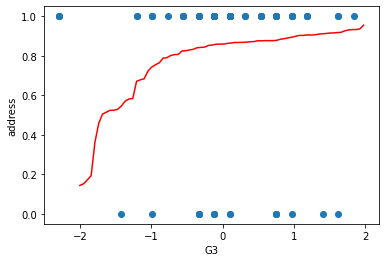

In [102]:
plt.scatter(notas, y_test)
plt.plot(notasnue, varobjor, color='red')
plt.xlabel('G3')
plt.ylabel('address')